In [1]:
import pandas as pd
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager, FontProperties

path = "/usr/share/fonts/opentype/linux-libertine/LinBiolinum_R.otf"
fontManager.addfont(path)
sns.set_theme(style="ticks", font=FontProperties(fname=path).get_name(), font_scale=1.2)

In [2]:
data = pd.concat([pd.read_csv(data, names=[
    "Mode", "Variant", "Number of Processors", "Latency"
]) for data in glob('saved/mutex/*.txt')], ignore_index=True)
# data

,Mode,Variant,Number of Processors,Latency
0,All,Untrusted,20,0.102878
1,All,Untrusted,20,0.176403
2,All,Untrusted,20,0.180484
3,All,Untrusted,20,0.180809
4,All,Untrusted,20,0.350908
...,...,...,...,...
17320,All,Untrusted,70,1.238159
17321,All,Untrusted,70,1.238721
17322,All,Untrusted,70,1.239129
17323,All,Untrusted,70,1.239409


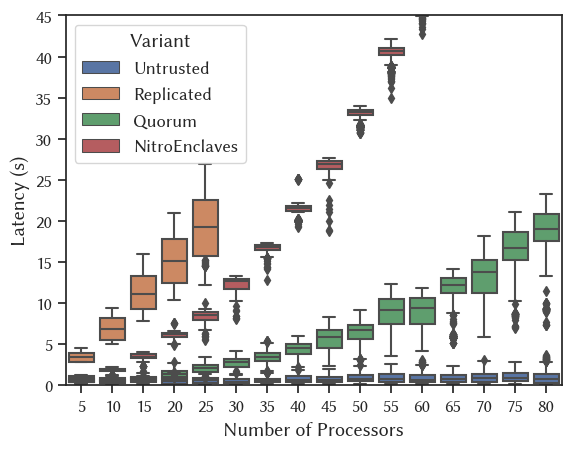

In [13]:
# plt.figure(figsize=(12, 3))
f = sns.boxplot(data=data[data["Mode"] == "All"],
    x="Number of Processors", y="Latency", hue="Variant", 
    hue_order=["Untrusted", "Replicated", "Quorum", "NitroEnclaves"], dodge=False)
f.set(ylabel="Latency (s)")
f.set(ylim=(0, 45))
f.figure.savefig("mutex-all.pdf", bbox_inches='tight')

/tmp/ipykernel_1681788/960514231.py:1: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  f = sns.lineplot(data=data[data["Mode"] == "One"],


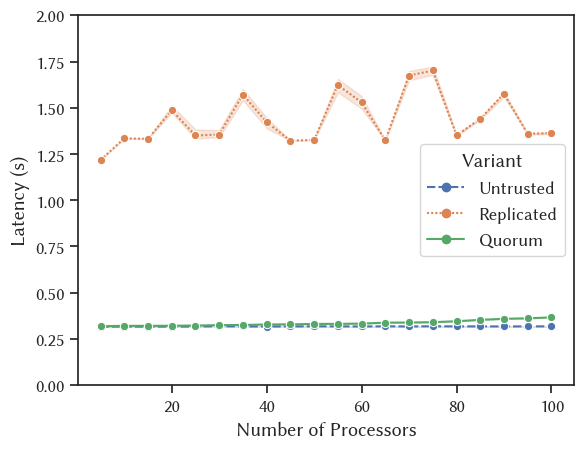

In [4]:
f = sns.lineplot(data=data[data["Mode"] == "One"],
    x="Number of Processors", y="Latency", hue="Variant", 
    hue_order=["Untrusted", "Replicated", "Quorum"],
    style="Variant", markers=["o"])
f.set(ylim=(0, 2.0))
f.set(ylabel="Latency (s)")
f.figure.savefig("mutex-one.pdf", bbox_inches='tight')